In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
iris = load_iris()
X,y = iris.data,iris.target

In [3]:
import pandas as pd 
X = pd.DataFrame(X,columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [5]:
# 算法参数
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'eta': 0.1,
    'seed': 1,
    'nthread': 4,
}

In [6]:
dtrain = xgb.DMatrix(X_train,y_train)

model = xgb.XGBClassifier(**params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

[16:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.93        22
           2       0.77      1.00      0.87        10

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.94        45



C:\Users\lipan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


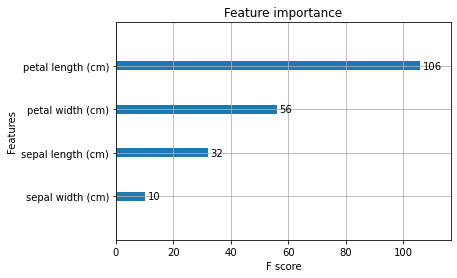

In [7]:
xgb.plot_importance(model)

In [11]:
from sklearn.model_selection import GridSearchCV
def Tuning(cv_params, other_params,x_train_array,y_train_):
    model2 = xgb.XGBClassifier(**other_params)
    optimized_GBM = GridSearchCV(estimator=model2, 
                                 param_grid=cv_params,
                                 scoring='accuracy',
                                 cv=5, 
                                 n_jobs=-1)
    optimized_GBM.fit(x_train_array, y_train_)
    evalute_result = optimized_GBM.cv_results_['mean_test_score']
    #print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
    return optimized_GBM

In [15]:
other_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3
}
cv_params = {
    'learning_rate':[0.01, 0.02, 0.05, 0.1, 0.15],
}
opt = Tuning(cv_params,other_params,X_train,y_train)

[17:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'learning_rate': 0.01}
最佳模型得分:0.9619047619047618


C:\Users\lipan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [17]:
other_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate':0.01,
}
cv_params = {
    'max_depth': [2,3,4,5],
    'min_child_weight': [0, 2, 5, 10, 20],
}
opt = Tuning(cv_params,other_params,X_train,y_train)

[17:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'max_depth': 2, 'min_child_weight': 0}
最佳模型得分:0.9619047619047618


C:\Users\lipan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [18]:
other_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate':0.01,
    'max_depth': 2,
    'min_child_weight': 0,

}
cv_params = {
    'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
}
opt = Tuning(cv_params,other_params,X_train,y_train)

C:\Users\lipan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'colsample_bytree': 0.5, 'subsample': 0.95}
最佳模型得分:0.9619047619047618


In [20]:
other_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate':0.01,
    'max_depth': 2,
    'min_child_weight': 0,
    'subsample': 0.95,
    'colsample_bytree': 0.5
}
cv_params = {
    
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
}
opt = Tuning(cv_params,other_params,X_train,y_train)

[17:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'reg_alpha': 0}
最佳模型得分:0.9619047619047618


C:\Users\lipan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [21]:
y_pred = opt.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.93        22
           2       0.77      1.00      0.87        10

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.94        45

